<a href="https://colab.research.google.com/github/beggy22/interacting-with-api-python-project-tutorial/blob/main/API_modulo10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Autenticación con la API de Spotify
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))


In [ ]:
# Busca el artista en Spotify
artist_name = "Maka"
results = sp.search(q=artist_name, type='artist')
artist_id = results['artists']['items'][0]['id']

# Obtén el top 10 de canciones del artista
top_tracks = sp.artist_top_tracks(artist_id)['tracks']

# Extrae la información relevante
track_data = []
for track in top_tracks[:10]:
    track_info = {
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': track['duration_ms'] / 60000  # Convertir duración a minutos
    }
    track_data.append(track_info)


In [ ]:
import pandas as pd

# Convertir los datos a un DataFrame
df_tracks = pd.DataFrame(track_data)

# Ordenar las canciones por popularidad creciente
df_tracks_sorted = df_tracks.sort_values(by='popularity', ascending=True)

# Mostrar el top 3 resultante
print(df_tracks_sorted.head(3))


         name  popularity  duration_min
4  El Maestro          52      5.118717
9  El Ondeado          53      5.689850
2        El R          54      6.034517


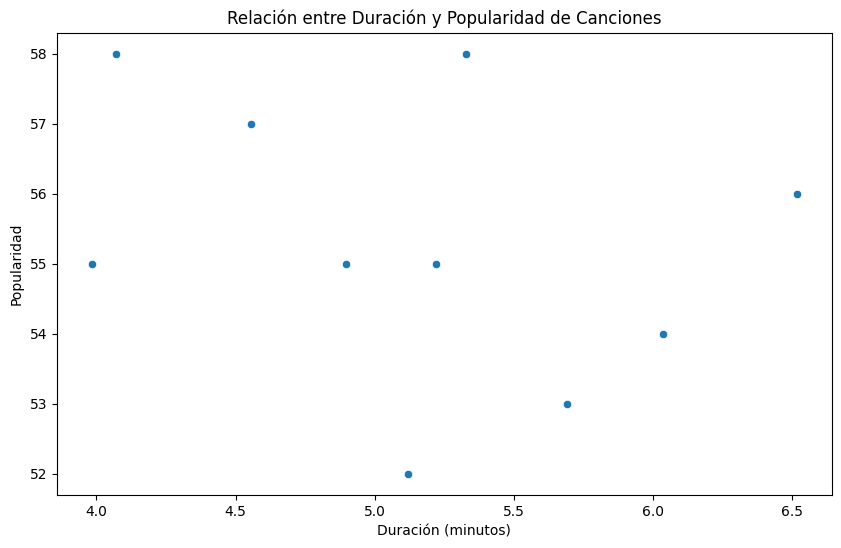

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='popularity', data=df_tracks)
plt.title('Relación entre Duración y Popularidad de Canciones')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.show()
